# Prostate Cancer Forensics—Regression

This notebook intends to provide an in-depth look at the trends and patterns noticed in prostate cancer data throughout the specified time period. By displaying and understanding these variables, we hope to gain insights into clinical tactics, resource allocation, and healthcare planning. In addition, this notebook investigates various machine learning methods for predicting and understanding the factors that influence prostate cancer outcomes.

# Importing Libraries, Preferences, and Helper Functions

## Importing Libraries

In [21]:
# System
import warnings

# Data manipulation
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# TensorFlow
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

## Preferencecs

In [3]:
# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

# The Data

In [4]:
# Load the dataset
data = pd.read_csv('/Users/mgpel/OneDrive/Autumn_Falls/prostate.csv')

# Preview the dataset, first 5 records
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


In [5]:
# Preview the dataset, last 5 records
data.tail()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,True
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,True
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,False
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,True
96,3.471966,3.974998,68,0.438255,1,2.904165,7,20,5.582932,False


# Feature Engineering

In [6]:
# Encode categorical variables
data['train'] = data['train'].astype(int)

# Split the data into features (X) and target (y)
X = data.drop(columns=['lpsa'])
y = data['lpsa']

In [7]:
# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building: Regressions

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [9]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression\nMSE: {mse_lr}\nR2: {r2_lr}")

Linear Regression
MSE: 0.35504326402319347
R2: 0.7518910350873982


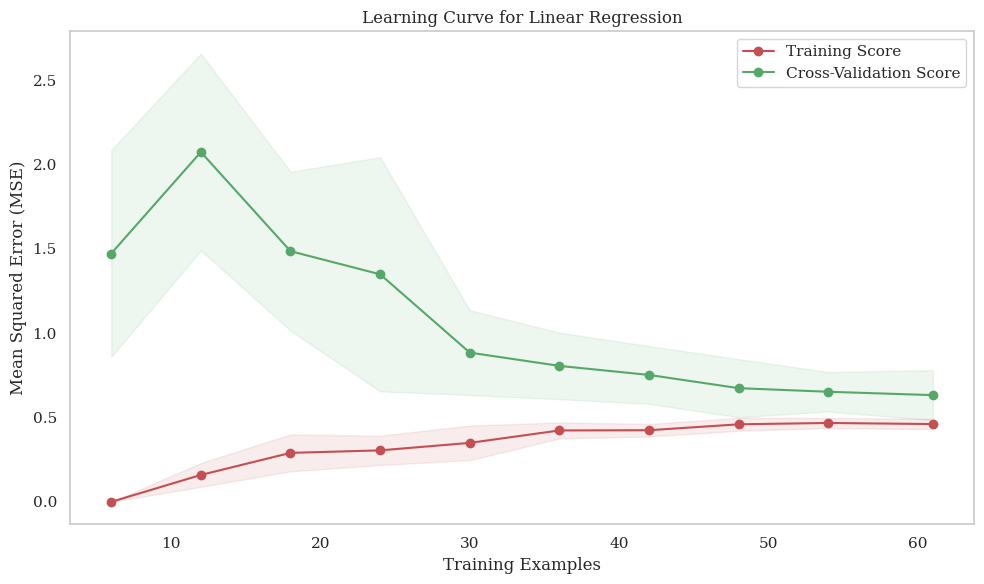

In [10]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Decision Tree

In [11]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree\nMSE: {mse_dt}\nR2: {r2_dt}")

Decision Tree
MSE: 0.9458226899906791
R2: 0.33904649831883515


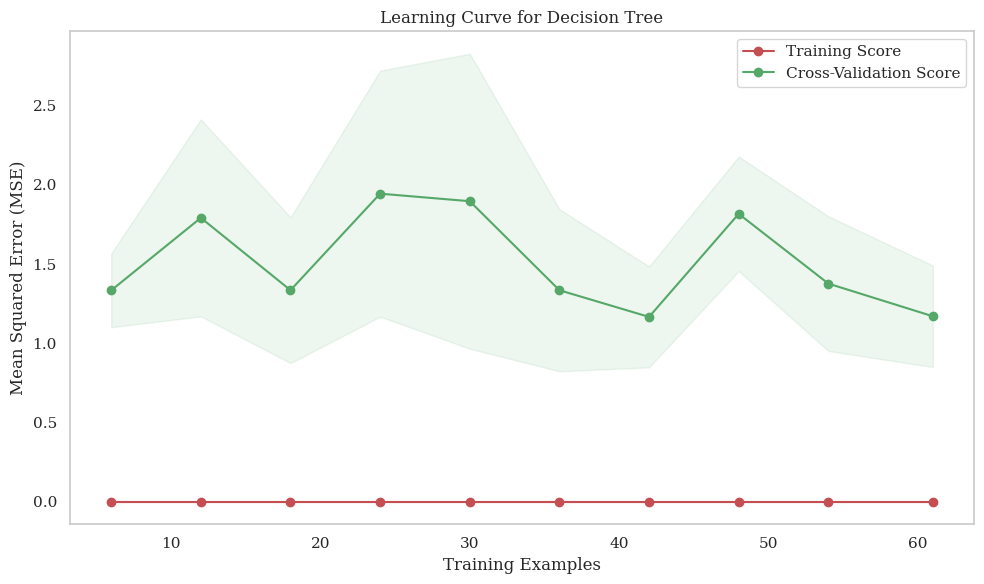

In [12]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Random Forest

In [13]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest\nMSE: {mse_rf}\nR2: {r2_rf}")

Random Forest
MSE: 0.5389913329568996
R2: 0.623345672858438


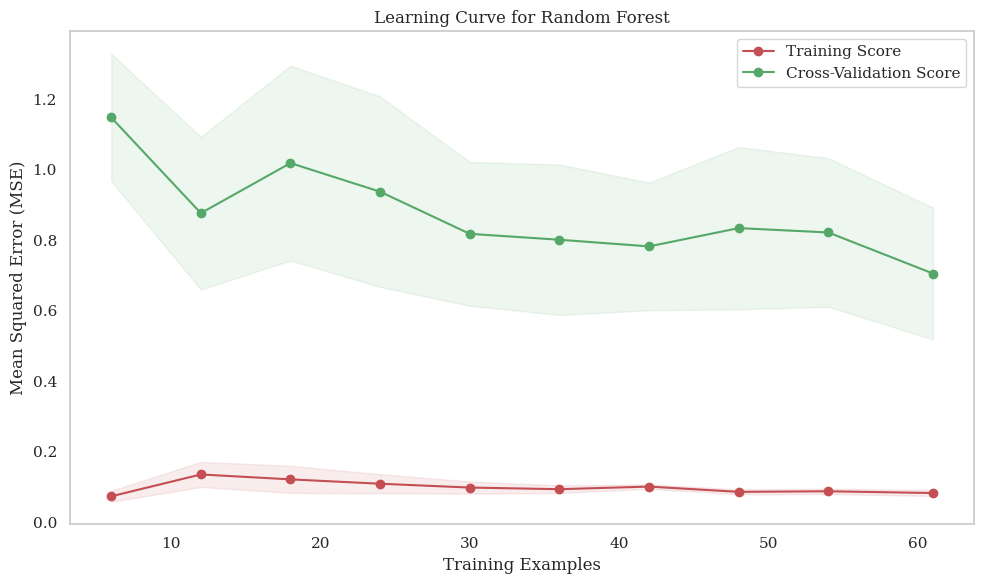

In [15]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Gradient Boosting

In [16]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting\nMSE: {mse_gb}\nR2: {r2_gb}")

Gradient Boosting
MSE: 0.9739318105774671
R2: 0.31940347021469995


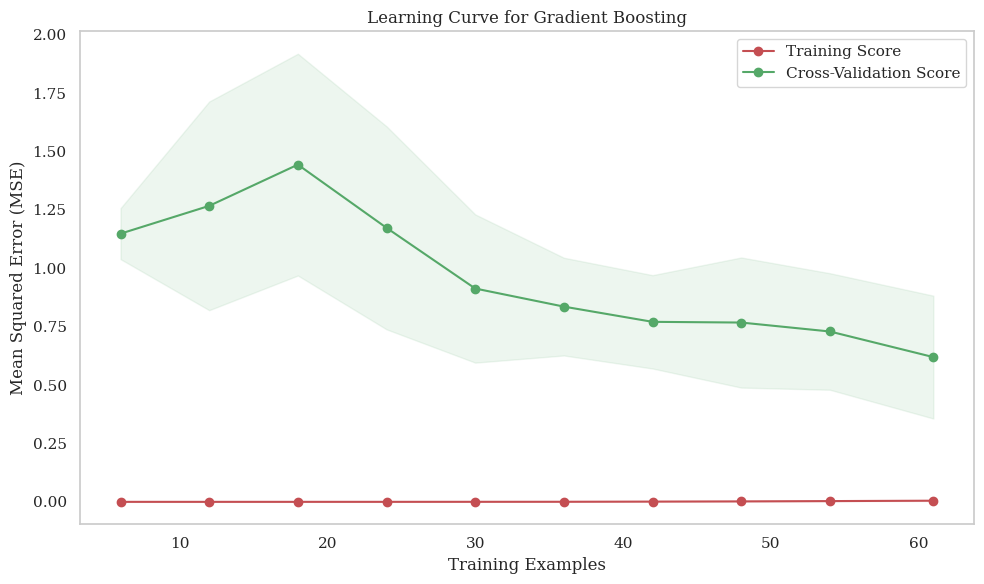

In [17]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Gradient Boosting")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Model Comparison

In [18]:
# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_gb],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_gb]
})

model_comparison

,Model,MSE,R2 Score
0,Linear Regression,0.355043,0.751891
1,Decision Tree,0.945823,0.339046
2,Random Forest,0.538991,0.623346
3,Gradient Boosting,0.973932,0.319403


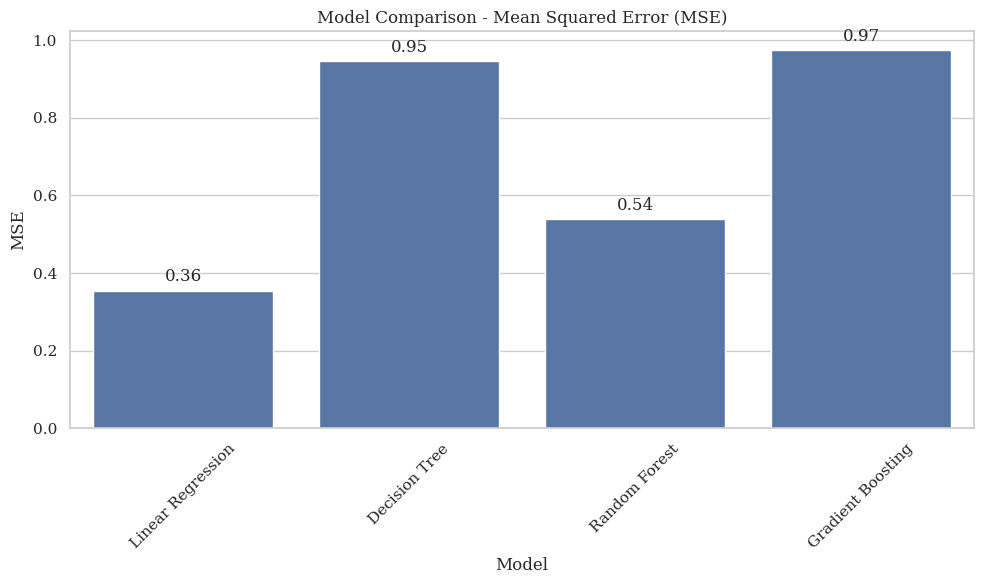

In [19]:
# Plot the comparison of MSE
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MSE', data=model_comparison)
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Add text annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display plot
plt.tight_layout()
plt.show()

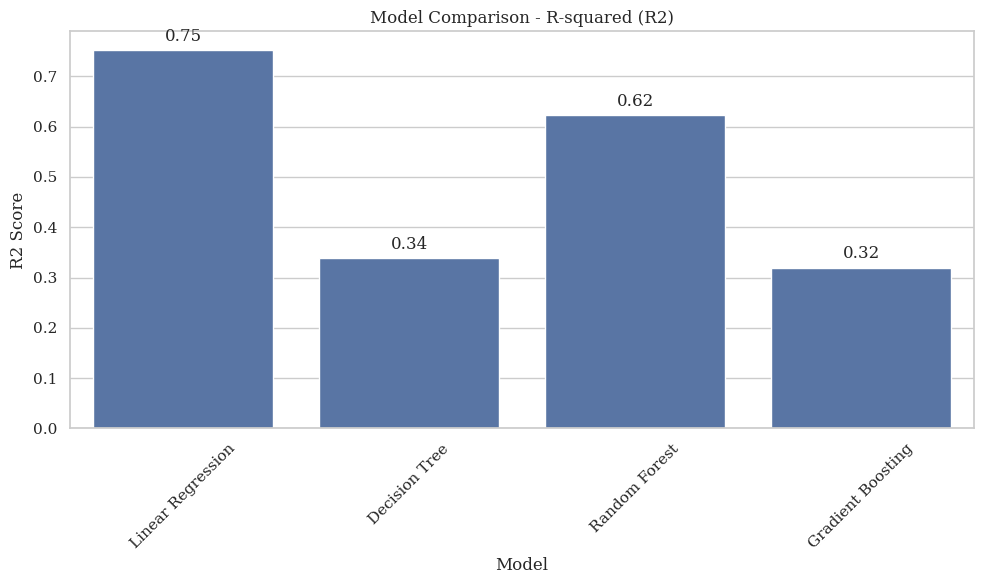

In [20]:
# Plot the comparison of R2
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R2 Score', data=model_comparison)
plt.title('Model Comparison - R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

# Add text annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display plot
plt.tight_layout()
plt.show()

1. **Mean Squared Error (MSE)**
    - **Lower MSE** indicates better performance.
    - **Linear Regression** has the lowest MSE (0.3550), followed by **Random Forest** (0.5390), **Decision Tree** (0.9458), and **Gradient Boosting** (0.9739).

2. **R-squared (R2)**
    - **Higher R2** indicates better performance.
    - **Linear Regression** has the highest R2 (0.7519), followed by **Random Forest** (0.6233), **Decision Tree** (0.3390), and **Gradient Boosting** (0.3194).


So,
- **Linear Regression** performs the best in terms of both MSE and R2. It has the lowest MSE and the highest R2, indicating that it is the most accurate and explains the most variance in the data.
- **Random Forest** is the second-best model, with a relatively low MSE and a high R2.
- **Decision Tree** and **Gradient Boosting** have higher MSE and lower R2 values, indicating that they are less accurate and explain less variance in the data compared to the other models.

In summary, **Linear Regression** is the top-performing model, followed by **Random Forest**, **Decision Tree** and **Gradient Boosting** are the least effective models in this comparison.